# **COVID-19 Global Data Analysis and Visualization**

Load and Inspect COVID-19 Dataset

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/covid_19_clean_complete.csv')
df["Date"] = pd.to_datetime(df["Date"])
df.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


COVID-19 Trends in United Kingdom (Confirmed, Deaths, Recovered)

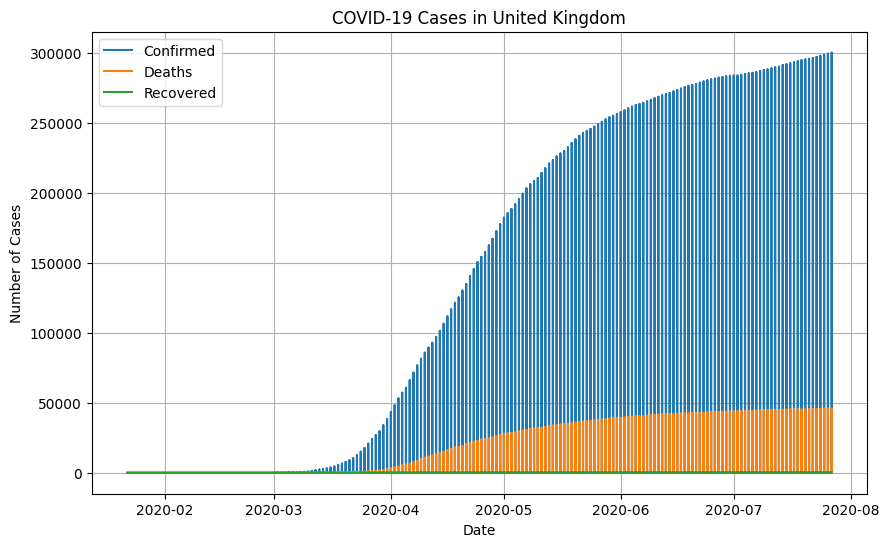

In [ ]:
uk = df[df["Country/Region"] == "United Kingdom"]

plt.figure(figsize=(10,6))
plt.plot(uk["Date"], uk["Confirmed"], label="Confirmed")
plt.plot(uk["Date"], uk["Deaths"], label="Deaths")
plt.plot(uk["Date"], uk["Recovered"], label="Recovered")
plt.title("COVID-19 Cases in United Kingdom")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.grid()
plt.show()


Covid-19 Trend in UK

In [ ]:
fig = px.line(uk, x="Date", y=["Confirmed", "Deaths", "Recovered"],
              title="COVID-19 Trend in United Kingdom")
fig.show()


Top-10 countries by confirmed cases

<Axes: title={'center': 'Top 10 Countries by Confirmed Cases'}, xlabel='Country/Region'>

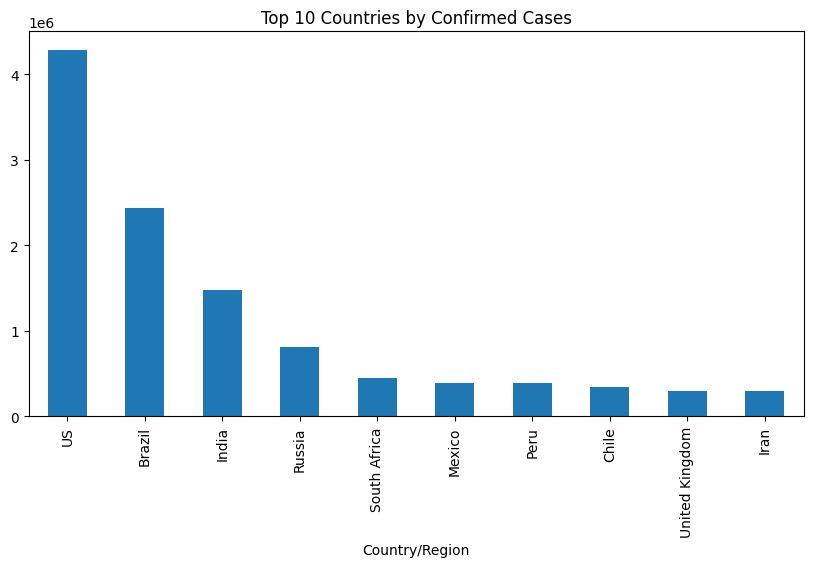

In [ ]:
latest_date = df["Date"].max()
latest_df = df[df["Date"] == latest_date]

top_countries = latest_df.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind="bar", figsize=(10,5), title="Top 10 Countries by Confirmed Cases")


Confirmed Cases over time

In [ ]:
top_5 = latest_df.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False).head(5).index
top_5_df = df[df["Country/Region"].isin(top_5)]

fig = px.line(top_5_df, x="Date", y="Confirmed", color="Country/Region",
              title="Confirmed Cases Over Time (Top 5 Countries)")
fig.show()


Covid-19 cases on daily basis **World Wide**

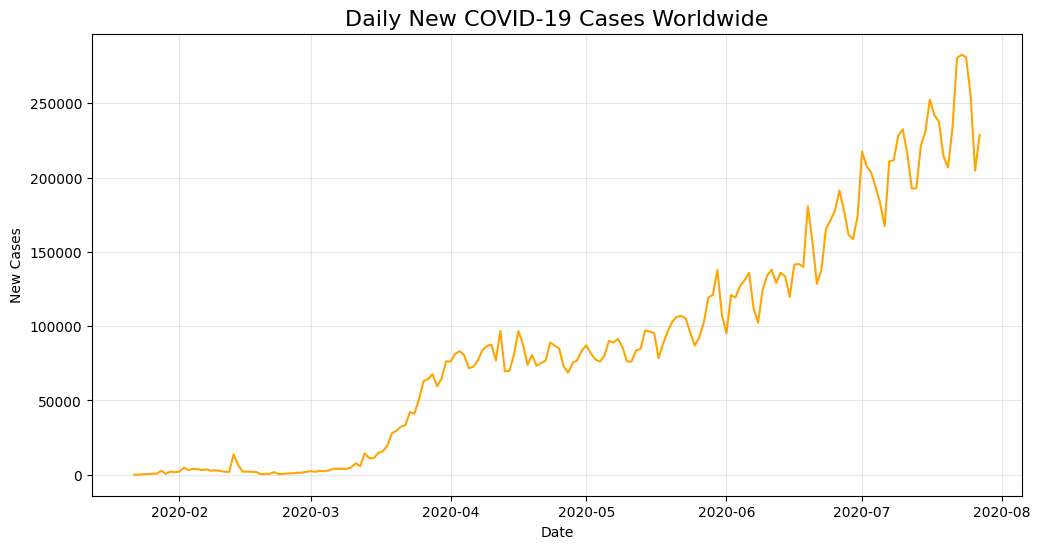

In [ ]:
daily_cases = df.groupby('Date')['Confirmed'].sum().diff().fillna(0)

plt.figure(figsize=(12,6))
plt.plot(daily_cases.index, daily_cases.values, color='orange')
plt.title("Daily New COVID-19 Cases Worldwide", fontsize=16)
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.grid(True, alpha=0.3)
plt.show()

Top 15 Countries by Case Fatality Rate

/tmp/ipython-input-1252368876.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




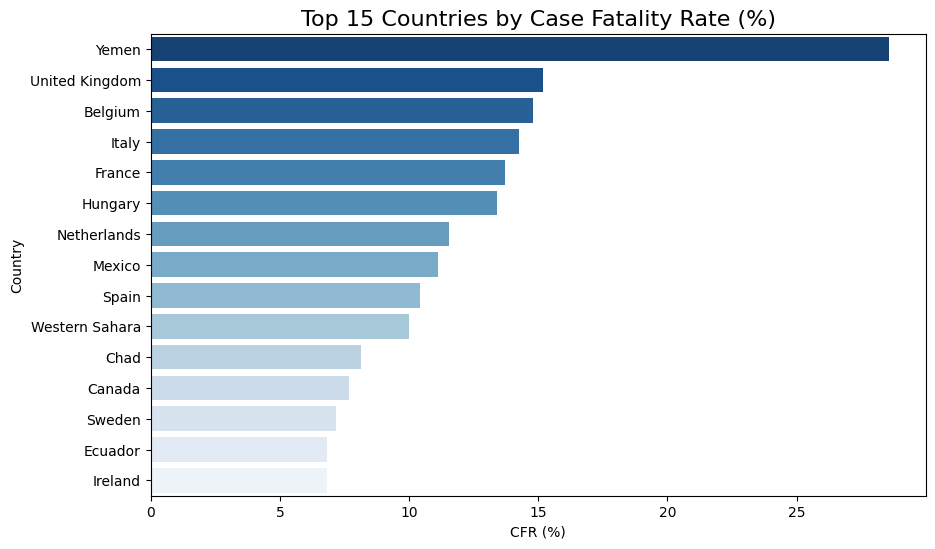

In [ ]:
latest_date = df['Date'].max()
latest = df[df['Date'] == latest_date]

cfr = (latest.groupby('Country/Region')['Deaths'].sum() /
       latest.groupby('Country/Region')['Confirmed'].sum()) * 100
cfr = cfr.dropna().sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(x=cfr.values, y=cfr.index, palette="Blues_r")
plt.title("Top 15 Countries by Case Fatality Rate (%)", fontsize=16)
plt.xlabel("CFR (%)")
plt.ylabel("Country")
plt.show()

Correlation Between Variables **(Confirmed, Death, Recovered)**

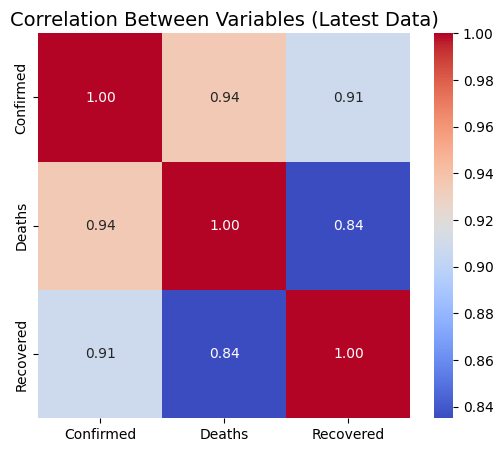

In [ ]:
corr_data = latest[['Confirmed','Deaths','Recovered']].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Variables (Latest Data)", fontsize=14)
plt.show()

Monthly covid-19 cases world wide

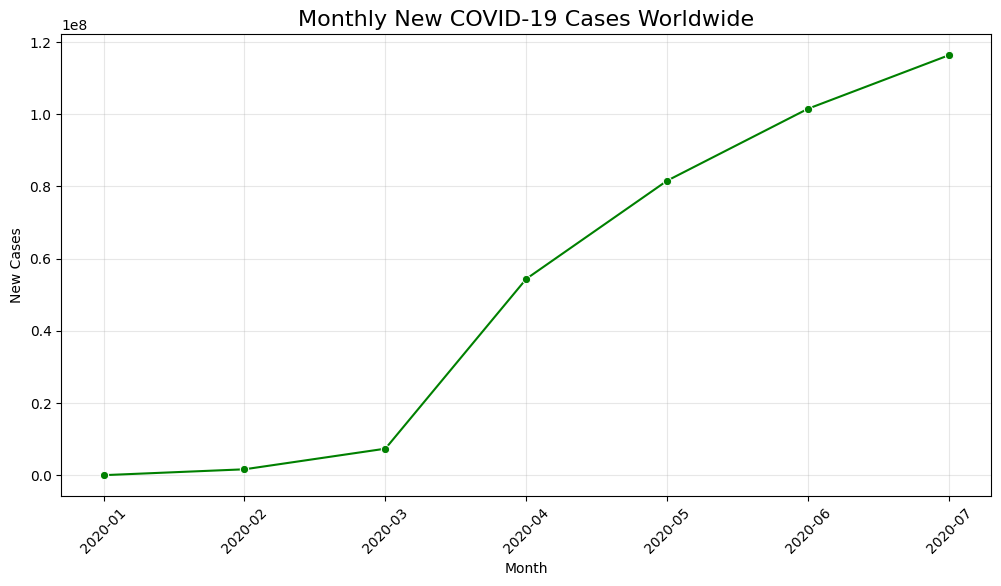

In [ ]:
monthly_cases = df.groupby(df['Date'].dt.to_period("M"))['Confirmed'].sum().diff().fillna(0)
monthly_cases.index = monthly_cases.index.astype(str)

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_cases.index, y=monthly_cases.values, marker="o", color="green")
plt.title("Monthly New COVID-19 Cases Worldwide", fontsize=16)
plt.xlabel("Month")
plt.ylabel("New Cases")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()